In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_emc=pd.read_csv('Datasets/911.csv')
df_emc.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df_emc.shape

(423909, 9)

In [4]:
df_emc.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
df_emc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
df_emc.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


## 1. Percentage of emergency type.

In [7]:
df_emc['emc_type']=df_emc['title'].apply(lambda title: title.split(':')[0])
df_emc['emc_type'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: emc_type, dtype: object

In [8]:
df=df_emc['emc_type'].value_counts()/len(df_emc)*100

In [9]:
df.head()

EMS        49.226603
Traffic    35.728895
Fire       15.044502
Name: emc_type, dtype: float64

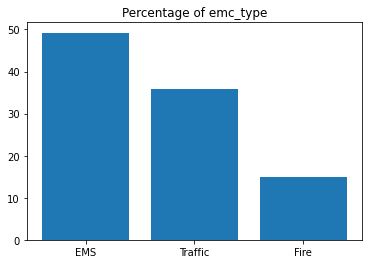

In [10]:
plt.bar(df.index,df)
plt.title('Percentage of emc_type')
plt.show()

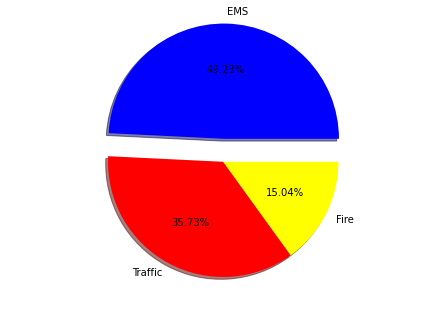

In [11]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.axis('equal')
axes.pie(df,labels=df.index,autopct='%.2f%%',shadow=True,explode=[0.2,0,0],colors=['blue','red','yellow'])
plt.show()

Text(0.5, 1.0, 'Emergency call Types')

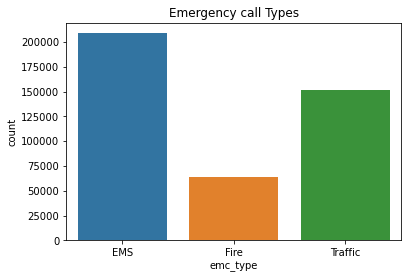

In [12]:
sns.countplot(x=df_emc['emc_type'],data=df_emc)
plt.title("Emergency call Types")

## 2. Calls received in certain time(hours).

In [13]:
df_emc['timeStamp']=pd.to_datetime(df_emc['timeStamp'])

In [14]:
df_emc['Hour']=df_emc['timeStamp'].apply(lambda time:time.hour)
df_emc['DaysOfWeek']=df_emc['timeStamp'].apply(lambda time:time.strftime('%a'))
df_emc['Month']=df_emc['timeStamp'].apply(lambda time:time.month)

In [15]:
df_emc.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,emc_type,Hour,DaysOfWeek,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,12


In [16]:
df_emc.groupby('Hour')['emc_type'].value_counts()

Hour  emc_type
0     EMS         5263
      Traffic     2046
      Fire        1341
1     EMS         4711
      Traffic     1566
                  ... 
22    Traffic     3685
      Fire        2082
23    EMS         6099
      Traffic     2945
      Fire        1723
Name: emc_type, Length: 72, dtype: int64

## 3. Calls received as per days of week in a month.

In [17]:
daylist='Mon Tue Wed Thu Fri Sat Sun'.split()

In [18]:
dayMonth=df_emc.groupby(['DaysOfWeek','Month']).count()['e'].unstack(level=1)
dayMonth.index=pd.Categorical(dayMonth.index, categories=daylist, ordered=True)
dayMonth.index.name='DaysOfWeek'

dayMonth.sort_index(inplace=True)
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
DaysOfWeek,,,,,,,,,,,,
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Tue,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
Wed,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
